In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
from sklearn.decomposition import FastICA
import requests
from tqdm import tqdm
from more_itertools import locate

def import_data():
    sb2_fits = fits.open("/Users/blaine/Documents/astrodata/apogee_sb2s-v1_0.fits", memmap=True)
    a = sb2_fits[1].data
    all_visit = fits.open("/Users/blaine/Documents/astrodata/allVisit-dr17-synspec_rev1.fits", memmap=True)
    b = all_visit[1].data
    all_star = fits.open("/Users/blaine/Documents/astrodata/allStar-dr17-synspec_rev1.fits", memmap=True)
    c = all_star[1].data

    return a,b,c

def filter_sb2(sb2):
    ret = []
    for i in range(0, sb2.shape[0]):
        arr = sb2[i][10]
        if arr[0] >= 3 and arr[1] >= 3 and arr[2] == 0 and arr[3] == 0:
            ret.append(i)
    return ret

def filter_allVisit(visit_id, visit, id_lst):
    ret = []
    for dat in tqdm(id_lst):
        dat_mjd = dat[0]
        dat_id = dat[1]
        temp = list(locate(visit_id[offset:-1], lambda x:x[1] == dat_mjd and x[0] == dat_id))
        if len(temp) > 0:
            idx = temp[0]
            ret.append([visit[idx][3], idx])
        else:
            continue
    return ret

def dict_display(dict,N):
    for i in range(0,N):
        print(list(dict.items())[i])
        print("")

In [2]:
pip install numpy==1.21.5

  Using cached numpy-1.21.5-cp39-cp39-macosx_10_9_x86_64.whl (17.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.5 which is incompatible.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.1.1 which is incompatible.
spleeter 2.3.0 requires numpy<1.20.0,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
sb2_raw, visit_raw, star_raw = import_data()
#Filter sb2 data to have both ratings above 3
sb2_idx = filter_sb2(sb2_raw)

In [3]:
#Condense SB2 Data into a list of all filtered elements
sb2_data = [sb2_raw[idx] for idx in sb2_idx]

In [4]:
#Create a Dictionary of all elements of sb2 logged by appogee ID
sb2_mjd = [[int(np.floor(element[1])), element] for element in sb2_data]

In [5]:
#Convert fits format to list of data
visit_id_list = [[visit[0], visit[7]] for visit in visit_raw]

In [6]:
sb2_info_list = [[b2[0],b2[1][0]] for b2 in sb2_mjd] 

In [18]:
visit_raw[656][3]

'asVisit-dr17-12776-59154-069.fits'

In [7]:
#Get the index of all_visit data that matches sb2_appid_lst
#filtered_allVisit = filter_allVisit(visit_id_list, visit_raw, sb2_info_list)

  0%|                                                                                                                                                                  | 0/100 [00:00<?, ?it/s]

[656]


  2%|███                                                                                                                                                       | 2/100 [00:08<06:41,  4.10s/it]

[661]


  3%|████▌                                                                                                                                                     | 3/100 [00:11<05:58,  3.70s/it]

[655]


  4%|██████▏                                                                                                                                                   | 4/100 [00:15<05:37,  3.51s/it]

[657]


  5%|███████▋                                                                                                                                                  | 5/100 [00:18<05:23,  3.40s/it]

[654]


  6%|█████████▏                                                                                                                                                | 6/100 [00:21<05:14,  3.34s/it]

[662]


  7%|██████████▊                                                                                                                                               | 7/100 [00:24<05:07,  3.30s/it]

[663]


  8%|████████████▎                                                                                                                                             | 8/100 [00:27<05:01,  3.28s/it]

[771]


  9%|█████████████▊                                                                                                                                            | 9/100 [00:31<04:56,  3.26s/it]

[817]


 10%|███████████████▎                                                                                                                                         | 10/100 [00:34<04:52,  3.25s/it]

[816]


 11%|████████████████▊                                                                                                                                        | 11/100 [00:37<04:48,  3.24s/it]

[1974]


 12%|██████████████████▎                                                                                                                                      | 12/100 [00:40<04:44,  3.23s/it]

[1975]


 13%|███████████████████▉                                                                                                                                     | 13/100 [00:43<04:41,  3.23s/it]

[2649]


 14%|█████████████████████▍                                                                                                                                   | 14/100 [00:47<04:37,  3.23s/it]

[2639]


 15%|██████████████████████▉                                                                                                                                  | 15/100 [00:50<04:33,  3.22s/it]

[2644]


 16%|████████████████████████▍                                                                                                                                | 16/100 [00:53<04:30,  3.23s/it]

[2647]


 17%|██████████████████████████                                                                                                                               | 17/100 [00:56<04:27,  3.22s/it]

[2629]


 18%|███████████████████████████▌                                                                                                                             | 18/100 [01:00<04:24,  3.22s/it]

[2625]


 19%|█████████████████████████████                                                                                                                            | 19/100 [01:03<04:21,  3.22s/it]

[2635]


 20%|██████████████████████████████▌                                                                                                                          | 20/100 [01:06<04:17,  3.22s/it]

[2646]


 21%|████████████████████████████████▏                                                                                                                        | 21/100 [01:09<04:14,  3.22s/it]

[2651]


 22%|█████████████████████████████████▋                                                                                                                       | 22/100 [01:12<04:11,  3.22s/it]

[2650]


 23%|███████████████████████████████████▏                                                                                                                     | 23/100 [01:16<04:08,  3.22s/it]

[2643]


 24%|████████████████████████████████████▋                                                                                                                    | 24/100 [01:19<04:04,  3.22s/it]

[2642]


 25%|██████████████████████████████████████▎                                                                                                                  | 25/100 [01:22<04:01,  3.22s/it]

[2641]


 26%|███████████████████████████████████████▊                                                                                                                 | 26/100 [01:25<03:58,  3.23s/it]

[2640]


 27%|█████████████████████████████████████████▎                                                                                                               | 27/100 [01:29<03:55,  3.23s/it]

[2637]


 28%|██████████████████████████████████████████▊                                                                                                              | 28/100 [01:32<03:52,  3.22s/it]

[2634]


 29%|████████████████████████████████████████████▎                                                                                                            | 29/100 [01:35<03:48,  3.22s/it]

[2633]


 30%|█████████████████████████████████████████████▉                                                                                                           | 30/100 [01:38<03:45,  3.22s/it]

[2623]


 31%|███████████████████████████████████████████████▍                                                                                                         | 31/100 [01:42<03:42,  3.22s/it]

[2622]


 32%|████████████████████████████████████████████████▉                                                                                                        | 32/100 [01:45<03:39,  3.23s/it]

[2624]


 33%|██████████████████████████████████████████████████▍                                                                                                      | 33/100 [01:48<03:36,  3.23s/it]

[2619]


 34%|████████████████████████████████████████████████████                                                                                                     | 34/100 [01:51<03:33,  3.24s/it]

[2630]


 35%|█████████████████████████████████████████████████████▌                                                                                                   | 35/100 [01:55<03:31,  3.25s/it]

[2631]


 36%|███████████████████████████████████████████████████████                                                                                                  | 36/100 [01:58<03:27,  3.25s/it]

[2632]


 37%|████████████████████████████████████████████████████████▌                                                                                                | 37/100 [02:01<03:24,  3.24s/it]

[2627]


 38%|██████████████████████████████████████████████████████████▏                                                                                              | 38/100 [02:04<03:20,  3.24s/it]

[2676]


 39%|███████████████████████████████████████████████████████████▋                                                                                             | 39/100 [02:07<03:17,  3.23s/it]

[2678]


 40%|█████████████████████████████████████████████████████████████▏                                                                                           | 40/100 [02:11<03:13,  3.23s/it]

[3001]


 41%|██████████████████████████████████████████████████████████████▋                                                                                          | 41/100 [02:14<03:10,  3.23s/it]

[3072]


 42%|████████████████████████████████████████████████████████████████▎                                                                                        | 42/100 [02:17<03:07,  3.23s/it]

[3952]


 43%|█████████████████████████████████████████████████████████████████▊                                                                                       | 43/100 [02:20<03:03,  3.22s/it]

[3951]


 44%|███████████████████████████████████████████████████████████████████▎                                                                                     | 44/100 [02:24<03:00,  3.22s/it]

[4669]


 45%|████████████████████████████████████████████████████████████████████▊                                                                                    | 45/100 [02:27<02:57,  3.22s/it]

[4950]


 46%|██████████████████████████████████████████████████████████████████████▍                                                                                  | 46/100 [02:30<02:53,  3.22s/it]

[4952]


 47%|███████████████████████████████████████████████████████████████████████▉                                                                                 | 47/100 [02:33<02:50,  3.22s/it]

[4951]


 48%|█████████████████████████████████████████████████████████████████████████▍                                                                               | 48/100 [02:36<02:47,  3.22s/it]

[5164]


 49%|██████████████████████████████████████████████████████████████████████████▉                                                                              | 49/100 [02:40<02:44,  3.22s/it]

[5167]


 50%|████████████████████████████████████████████████████████████████████████████▌                                                                            | 50/100 [02:43<02:41,  3.22s/it]

[5170]


 51%|██████████████████████████████████████████████████████████████████████████████                                                                           | 51/100 [02:46<02:37,  3.22s/it]

[5171]


 52%|███████████████████████████████████████████████████████████████████████████████▌                                                                         | 52/100 [02:49<02:34,  3.22s/it]

[5172]


 53%|█████████████████████████████████████████████████████████████████████████████████                                                                        | 53/100 [02:53<02:31,  3.22s/it]

[5166]


 54%|██████████████████████████████████████████████████████████████████████████████████▌                                                                      | 54/100 [02:56<02:28,  3.22s/it]

[5168]


 55%|████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 55/100 [02:59<02:25,  3.22s/it]

[5433]


 56%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 56/100 [03:02<02:21,  3.22s/it]

[5430]


 57%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 57/100 [03:05<02:18,  3.22s/it]

[5434]


 58%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 58/100 [03:09<02:15,  3.22s/it]

[5435]


 59%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 59/100 [03:12<02:12,  3.22s/it]

[6079]


 60%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 60/100 [03:15<02:08,  3.22s/it]

[6080]


 61%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 61/100 [03:18<02:05,  3.23s/it]

[6149]


 62%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 62/100 [03:22<02:02,  3.23s/it]

[6558]


 63%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 63/100 [03:25<01:59,  3.22s/it]

[6729]


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 64/100 [03:28<01:55,  3.22s/it]

[6815]


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 65/100 [03:31<01:52,  3.22s/it]

[6820]


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 66/100 [03:34<01:49,  3.22s/it]

[6817]


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 67/100 [03:38<01:46,  3.22s/it]

[6909]


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 68/100 [03:41<01:43,  3.22s/it]

[6908]


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 69/100 [03:44<01:39,  3.22s/it]

[7311]


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 70/100 [03:47<01:36,  3.22s/it]

[7304]


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 71/100 [03:51<01:33,  3.22s/it]

[7308]


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 72/100 [03:54<01:30,  3.22s/it]

[7307]


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 73/100 [03:57<01:27,  3.22s/it]

[7303]


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 74/100 [04:00<01:23,  3.23s/it]

[7305]


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 75/100 [04:03<01:20,  3.24s/it]

[7310]


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 76/100 [04:07<01:17,  3.24s/it]

[7309]


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 77/100 [04:10<01:14,  3.24s/it]

[7302]


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 78/100 [04:13<01:11,  3.23s/it]

[7362]


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 79/100 [04:16<01:07,  3.23s/it]

[7363]


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 80/100 [04:20<01:04,  3.23s/it]

[7359]


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 81/100 [04:23<01:01,  3.23s/it]

[7393]


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 82/100 [04:26<00:58,  3.22s/it]

[8415]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 83/100 [04:29<00:54,  3.22s/it]

[9980]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 84/100 [04:33<00:51,  3.23s/it]

[10399]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 85/100 [04:36<00:48,  3.23s/it]

[10400]


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 86/100 [04:39<00:45,  3.22s/it]

[10401]


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 87/100 [04:42<00:41,  3.22s/it]

[10402]


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 88/100 [04:45<00:38,  3.22s/it]

[10403]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 89/100 [04:49<00:35,  3.22s/it]

[11043]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 90/100 [04:52<00:32,  3.22s/it]

[11237]


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 91/100 [04:55<00:29,  3.22s/it]

[11461]


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 92/100 [04:58<00:25,  3.22s/it]

[12751]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 93/100 [05:02<00:22,  3.22s/it]

[12755]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 94/100 [05:05<00:19,  3.22s/it]

[12752]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 95/100 [05:08<00:16,  3.22s/it]

[13159]


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 96/100 [05:11<00:12,  3.22s/it]

[13444]


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 97/100 [05:14<00:09,  3.22s/it]

[13443]


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 98/100 [05:18<00:06,  3.22s/it]

[13442]


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 99/100 [05:21<00:03,  3.22s/it]

[14546]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:24<00:00,  3.25s/it]

[15128]


In [7]:
f = open("data_visits.txt", "r")
temp = f.readlines()
filtered_allVisit = []
for line in temp:
    el = line
    el = el.replace("[","")
    el = el.replace("]","")
    el = el.replace("'","")
    el = el.replace(" ","")
    final = el.split(",")
    final[1] = int(final[1])
    filtered_allVisit.append(final)

In [8]:
filenames = [e[0] for e in  filtered_allVisit]

In [9]:
filtered_allVisit

[['asVisit-dr17-12776-59154-069.fits', 656],
 ['asVisit-dr17-12776-59155-069.fits', 661],
 ['asVisit-dr17-12776-59156-069.fits', 655],
 ['asVisit-dr17-12776-59157-069.fits', 657],
 ['asVisit-dr17-12776-59164-070.fits', 654],
 ['asVisit-dr17-12776-59165-070.fits', 662],
 ['asVisit-dr17-12776-59166-070.fits', 663],
 ['apVisit-dr17-7063-56666-028.fits', 771],
 ['apVisit-dr17-9243-57677-015.fits', 817],
 ['apVisit-dr17-9243-57654-016.fits', 816],
 ['apVisit-dr17-12184-58776-247.fits', 1974],
 ['apVisit-dr17-12184-58861-253.fits', 1975],
 ['apVisit-dr17-9069-57822-224.fits', 2649],
 ['apVisit-dr17-9069-58150-224.fits', 2639],
 ['apVisit-dr17-9264-59059-221.fits', 2644],
 ['apVisit-dr17-9264-59159-227.fits', 2647],
 ['apVisit-dr17-7950-58731-227.fits', 2629],
 ['apVisit-dr17-7950-59074-224.fits', 2625],
 ['apVisit-dr17-7951-59155-278.fits', 2635],
 ['apVisit-dr17-9264-57672-224.fits', 2646],
 ['apVisit-dr17-9264-57709-227.fits', 2651],
 ['apVisit-dr17-9519-57760-224.fits', 2650],
 ['apVisit-

In [11]:
filenames

['asVisit-dr17-12776-59154-069.fits',
 'asVisit-dr17-12776-59155-069.fits',
 'asVisit-dr17-12776-59156-069.fits',
 'asVisit-dr17-12776-59157-069.fits',
 'asVisit-dr17-12776-59164-070.fits',
 'asVisit-dr17-12776-59165-070.fits',
 'asVisit-dr17-12776-59166-070.fits',
 'apVisit-dr17-7063-56666-028.fits',
 'apVisit-dr17-9243-57677-015.fits',
 'apVisit-dr17-9243-57654-016.fits',
 'apVisit-dr17-12184-58776-247.fits',
 'apVisit-dr17-12184-58861-253.fits',
 'apVisit-dr17-9069-57822-224.fits',
 'apVisit-dr17-9069-58150-224.fits',
 'apVisit-dr17-9264-59059-221.fits',
 'apVisit-dr17-9264-59159-227.fits',
 'apVisit-dr17-7950-58731-227.fits',
 'apVisit-dr17-7950-59074-224.fits',
 'apVisit-dr17-7951-59155-278.fits',
 'apVisit-dr17-9264-57672-224.fits',
 'apVisit-dr17-9264-57709-227.fits',
 'apVisit-dr17-9519-57760-224.fits',
 'apVisit-dr17-9264-58009-218.fits',
 'apVisit-dr17-9519-58028-221.fits',
 'apVisit-dr17-9264-58054-224.fits',
 'apVisit-dr17-9519-58083-224.fits',
 'apVisit-dr17-9519-58121-224

In [12]:
visit_raw[656]["SNR"]

379.302

In [13]:
allvisit_mjd_list = [visit_raw[x[1]][7] for x in filtered_allVisit]

In [14]:
len(allvisit_mjd_list)

16284

In [15]:
unique_all_visit = list(dict.fromkeys(allvisit_mjd_list))

In [16]:
len(unique_all_visit)

1839

In [17]:
a_visit_file_name = []
un = []
cnt = 0
for mjd in tqdm(sb2_mjd):
    try:
        idx = allvisit_mjd_list.index(mjd[0])
        a_visit_file_name.append([visit_raw[filtered_allVisit[idx][1]][0],mjd[0],filtered_allVisit[idx][0]])
    except ValueError:
        cnt += 1
        continue

100%|████████████████████████████████████| 16690/16690 [01:28<00:00, 188.35it/s]


In [18]:
t = [x[2] for x in a_visit_file_name]
t = list(dict.fromkeys(t))

In [60]:
f = open("visit_installation.txt", "a")
cnt = 0
for a in tqdm(t):
    one = a.split("-")[2]
    two = a.split("-")[3]
    f.write("https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/plates/" + one + "/" + two + "/" + a + "\n")
f.close()

100%|███████████████████████████████████| 1839/1839 [00:00<00:00, 234034.99it/s]


In [19]:
temp_list = [str(a) for a in a_visit_file_name]
temp_list = list(dict.fromkeys(temp_list))

In [20]:
list_for_db = []
for g in temp_list:
    el = g
    el = el.replace("[","")
    el = el.replace("]","")
    el = el.replace("'","")
    el = el.replace(" ","")
    final = el.split(",")
    final[1] = int(final[1])
    list_for_db.append(final)

In [21]:
list_for_db

[['2M00004521-7219055', 59154, 'asVisit-dr17-12776-59154-069.fits'],
 ['2M00004521-7219055', 59155, 'asVisit-dr17-12776-59155-069.fits'],
 ['2M00004521-7219055', 59156, 'asVisit-dr17-12776-59156-069.fits'],
 ['2M00004521-7219055', 59157, 'asVisit-dr17-12776-59157-069.fits'],
 ['2M00004521-7219055', 59164, 'asVisit-dr17-12776-59164-070.fits'],
 ['2M00004521-7219055', 59165, 'asVisit-dr17-12776-59165-070.fits'],
 ['2M00004521-7219055', 59166, 'asVisit-dr17-12776-59166-070.fits'],
 ['2M00005196+0022164', 56666, 'apVisit-dr17-7063-56666-028.fits'],
 ['2M00005343+0040594', 57677, 'apVisit-dr17-9243-57677-015.fits'],
 ['2M00005343+0040594', 57654, 'apVisit-dr17-9243-57654-016.fits'],
 ['2M00015725+5726512', 58776, 'apVisit-dr17-12184-58776-247.fits'],
 ['2M00015725+5726512', 58861, 'apVisit-dr17-12184-58861-253.fits'],
 ['2M00023036+8524194', 57822, 'apVisit-dr17-9069-57822-224.fits'],
 ['2M00023036+8524194', 58150, 'apVisit-dr17-9069-58150-224.fits'],
 ['2M00023036+8524194', 59059, 'apVisit

In [109]:
temp = 0
for lst in tqdm(list_for_db):
    try:
        filename = str(lst[2])
        mjd = int(lst[1])
        apogeeID = lst[0]
        try:
            testing_data = fits.open("/Users/bmason3/astrodata/data2/" + filename, memmap=True)
        except FileNotFoundError:
            continue
        fluxa = [float(a) for a in testing_data[1].data[0]]
        wavelengtha = [float(a) for a in testing_data[4].data[0]]
        fluxb = [float(a) for a in testing_data[1].data[1]]
        wavelengthb = [float(a) for a in testing_data[4].data[1]]
        fluxc = [float(a) for a in testing_data[1].data[2]]
        wavelengthc = [float(a) for a in testing_data[4].data[2]]
        
        tmplst = [mjd, apogeeID]
        tempidx = list(locate(sb2_info_list, lambda x:x == tmplst))
        allvisit_temp_idx = list(locate(filtered_allVisit, lambda x:x[0] == filename))
        allvisit_idx = filtered_allVisit[allvisit_temp_idx[0]][1]
        extract_data_0 = visit_raw[allvisit_idx]
        extract_data_1 = sb2_data[tempidx[0]]
        
        ampa = float(extract_data_1[4][0])
        vhelioa = float(extract_data_1[5][0])
        fwhma = float(extract_data_1[6][0])
        ampb = float(extract_data_1[4][1])
        vheliob = float(extract_data_1[5][1])
        fwhmb = float(extract_data_1[6][1])
        SNR = float(extract_data_0["SNR"])
        if np.isnan(ampa) or np.isnan(SNR) or np.isnan(vhelioa) or np.isnan(ampa) or np.isnan(fwhma) or np.isnan(ampb) or np.isnan(vheliob) or np.isnan(fwhmb):
            continue
        attr = ["temp", "filename", "apogeeID", "fluxa", "wavelengtha", "fluxb", "wavelengthb", "fluxc", "wavelengthc",
                     "ampa", "vhelioa", "fwhma", "ampb", "vheliob", "fwhmb", "SNR", "mjd"]
        vals = [temp, filename, apogeeID, fluxa, wavelengtha, fluxb, wavelengthb, fluxc, wavelengthc,
                         ampa, vhelioa, fwhma, ampb, vheliob, fwhmb, SNR, mjd]
        to_json = {a:b for a,b in zip(attr,vals)}
        requests.post('http://127.0.0.1:8050/test', json=to_json)
        temp += 1
    except ValueError:
        print("bruh")
        pass

100%|█████████████████████████████████████| 1839/1839 [1:12:35<00:00,  2.37s/it]


In [110]:
ids = requests.get('http://127.0.0.1:8050/get-snr/500')

In [111]:
ids.json()

{'0': ['2M00111801-2114586', 560.6019897460938, 58794],
 '1': ['2M00111801-2114586', 591.4039916992188, 58796],
 '10': ['2M14315024+5101159', 729.7030029296875, 57532],
 '11': ['2M15123445+3558177', 505.0419921875, 57890],
 '12': ['2M19374372-0503422', 695.3319702148438, 56903],
 '13': ['2M21252692+1120457', 613.0040283203125, 56847],
 '2': ['2M00111801-2114586', 588.9089965820312, 58803],
 '3': ['2M06525427+2545517', 583.6950073242188, 57466],
 '4': ['2M07595891+4747070', 572.1859741210938, 57362],
 '5': ['2M12184090+2611253', 550.0709838867188, 56819],
 '6': ['2M12201518-0008404', 549.9949951171875, 56027],
 '7': ['2M12514270+4401240', 509.4599914550781, 57077],
 '8': ['2M13033866+2826598', 502.8739929199219, 57896],
 '9': ['2M14315024+5101159', 835.0919799804688, 57529]}

In [22]:
names = []
for star in star_raw:
    names.append(star[1])

In [23]:
idx = []
for app in list_for_db:
    ids = app[0]
    idx.append(names.index(ids))

In [24]:
idx = list(dict.fromkeys(idx))

In [109]:
dirs = []
fnames = {}
apps_ids = []
for i in idx:
    fname = star_raw[i][0]
    appogeeid = star_raw[i][1]
    apps_ids.append(appogeeid)
    fnames[appogeeid] = fname
    directory = star_raw[i][2]
    lst = directory.split(".")[0:2]
    strng = "/" + "/".join(lst) + "/" + fname
    dirs.append(strng)

In [126]:
aspcapstar_dirs = ["https://data.sdss.org/sas/dr17/apogee/spectro/aspcap/dr17/synspec" + d for d in dirs]

In [26]:
dirs = ["https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/" + d for d in dirs]

In [27]:
f = open("data_apstar.txt", "r")
read = f.readlines()
old_list = []
for r in read:
    old_list.append(r.replace("\n", ""))
f.close()

In [104]:
f = open("data_apstar_temp.txt", "a")
for d in dirs:
    f.write(d + "\n")
f.close()

In [28]:
new_dload = [d for d in dirs if d not in old_list]

In [154]:
f = open("data_apstar_download.txt", "a")
for d in new_dload:
    f.write(d + "\n")
f.close()

In [29]:
app_ids = list(fnames.keys())

In [72]:
app_ids.index("2M00212698+0309415")

29

Found


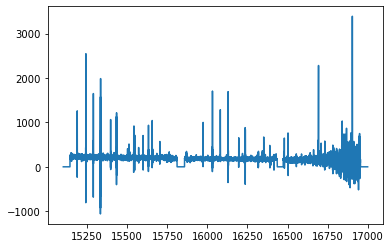

In [92]:
for i in tqdm(app_ids):
    if fnames[i] == "":
        continue
    try:
        star = fits.open("/Users/bmason3/astrodata/data_apstar/" + fnames[i])
    except FileNotFoundError:
        continue
    apogeeID = i
    
    visits = star[0].header["NVISITS"]
    lst_ccf = []
    lst_mjd = []
    for i in range(0, visits):
        mjd = int(np.floor(star[9].data[i]["jd"]))
        ccf_y = [float(a) if not np.isnan(a) else 0 for a in star[9].data[i]['CCF']]
        lst_ccf.append(ccf_y)
        lst_mjd.append(mjd)
    attr = ["apogeeID", "nvisits", "mjd", "ccf"]
    vals = [apogeeID, visits, lst_mjd, lst_ccf]
    to_json = {a:b for a,b in zip(attr,vals)}
    requests.post('http://127.0.0.1:8050/addccf', json=to_json)

In [192]:
ids = requests.get('http://127.0.0.1:8050/get-ccf/2M14315024+5101159')
ids.json().keys()

dict_keys(['56459', '56698', '56700', '57498', '57499', '57524', '57529', '57532', '57553', '57556', '57770', '57792', '57793', '57796', '57801', '57819', '57828', '57831', '57849', '57852'])

In [128]:
temp = [a.replace("apStar","aspcapStar") for a in aspcapstar_dirs]

In [129]:
temp_temp = [a.replace("asStar","aspcapStar") for a in temp]

In [132]:
f = open("data_aspcapstar.txt", "a")
for d in temp_temp:
    f.write(d + "\n")
f.close()

In [142]:
aspcapstar_fnames = [a.split("/")[-1] for a in temp_temp]

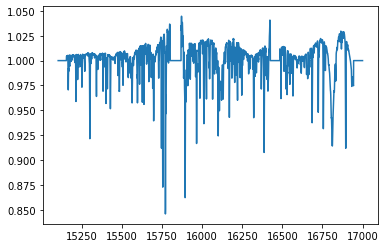

In [149]:
tempstar = aspcapstar_fnames[0]
star = fits.open("/Users/blaine/Documents/astrodata/data_aspcapstar/" + tempstar)
y = star[3].data
y = [float(a) if a != 0 else 1 for a in y]
a = np.power(10,star[3].header["CRVAL1"])
step = np.power(10,star[3].header["CDELT1"])
temp= np.arange(star[3].header["CRVAL1"], star[3].header["CRVAL1"]+8575*star[3].header["CDELT1"],star[3].header["CDELT1"])
lam = np.power(10, temp)
plt.plot(lam, y)

In [ ]:
[float(a) if not np.isnan(a) else 0 for a in y]